In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#importing the medical insurance cost prediction dataset
medical_df=pd.read_csv('/kaggle/input/medical-insurance-cost-prediction/medical_insurance.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis

In [5]:
# Shape is used to find the no of rows and columns in dataframe
medical_df.shape

(2772, 7)

### Summarizing the data

In [6]:
# Describe function gives statisticall measures of data frame
medical_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# info gives the information of data types in their number and data type
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### Visualizing the data

In [8]:
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
medical_df.age.describe()
fig=px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
# Body Mass Index
medical_df.bmi.describe()

count    2772.000000
mean       30.701349
std         6.129449
min        15.960000
25%        26.220000
50%        30.447500
75%        34.770000
max        53.130000
Name: bmi, dtype: float64

In [11]:
fig=px.histogram(medical_df,x='bmi',marginal='box',nbins=42,title='Body Mass Index',color_discrete_sequence=['grey']) # Using color sequence
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
# Charges on Smoker and non smokers (Relationship)
fig=px.histogram(medical_df,
                 x='charges',
                 color='smoker',
                 marginal='box',
                 color_discrete_sequence=['grey','blue'],
                 title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [13]:
medical_df.smoker.value_counts() # Number of smokers and no smokers in a dataset

smoker
no     2208
yes     564
Name: count, dtype: int64

In [14]:
# visualizing the smoker dataset
fig=px.histogram(medical_df,x='smoker',color='sex',title='Smoker')
fig.update_layout(bargap=0.3)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [15]:
#visulaizing ages and charges
fig=px.scatter(medical_df,
              x='age',
              y='charges',
              color='smoker',
              opacity=0.8,
              hover_data=['sex'],
              title='Ages vs Charges')
fig.update_traces(marker_size=5)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [16]:
# Relationship between BMI and Charges
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data='sex',title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
px.violin(medical_df,x='children',y='charges')

In [18]:
# Finding the correlation between the dataset
medical_df.charges.corr(medical_df.age)
medical_df.charges.corr(medical_df.bmi)

0.19984604873978873

In [19]:
smoker_values={'no':0,'yes':1}
smoker_numeric=medical_df.smoker.map(smoker_values)

In [20]:
medical_df.charges.corr(smoker_numeric)

0.7887833491419141

In [21]:
correlate=medical_df.drop(['sex','smoker','region'],axis=1)
correlate.corr()

,age,bmi,children,charges
age,1.000000,0.113048,0.037574,0.298624
bmi,0.113048,1.000000,-0.001492,0.199846
children,0.037574,-0.001492,1.000000,0.066442
charges,0.298624,0.199846,0.066442,1.000000


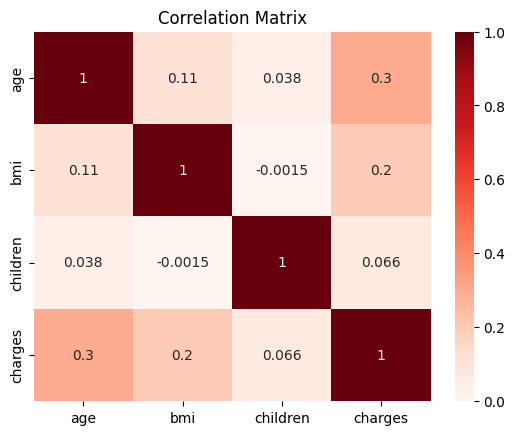

In [22]:
sns.heatmap(correlate.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')
plt.show()

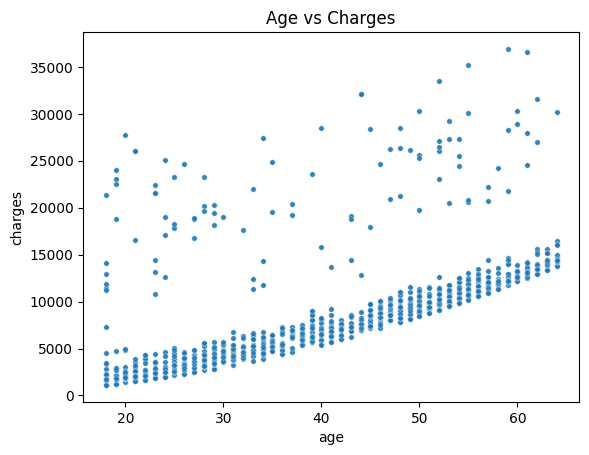

In [23]:
# we assign non smokers separate because of categotical data
non_smokers=medical_df[medical_df.smoker=='no']


sns.scatterplot(non_smokers,x='age',y='charges',alpha=0.7,s=15)
plt.title('Age vs Charges')
plt.show()

### Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.


Formula:
y=β0+β1x+ε   (Simple linear Regression)

β0 -> intercept

β1 -> Slope

x -> Independent Variable

y -> Dependent Variable

ε -> error terms


y=β0+β1x1+β2x2+…+βnxn+ε  (Multiple Linear Regression)

In [24]:
def estimate(b0,b1,x):
    return b0+b1*x

In [25]:
estimate(100,50,30)

1600

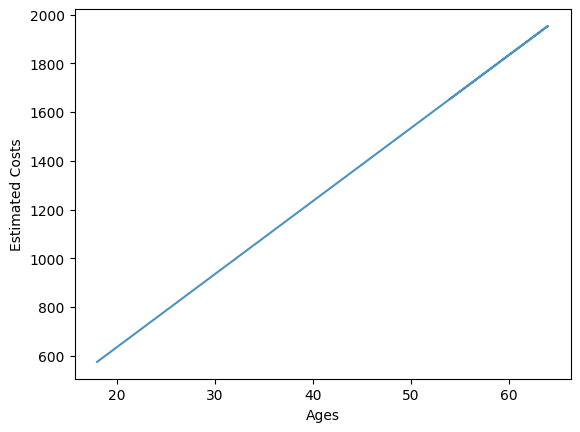

In [26]:
ages=non_smokers.age
estimated_charges=estimate(b0=34,b1=30,x=ages)
estimate=plt.plot(ages,estimated_charges,alpha=0.8)
plt.xlabel('Ages')
plt.ylabel('Estimated Costs')
plt.show()

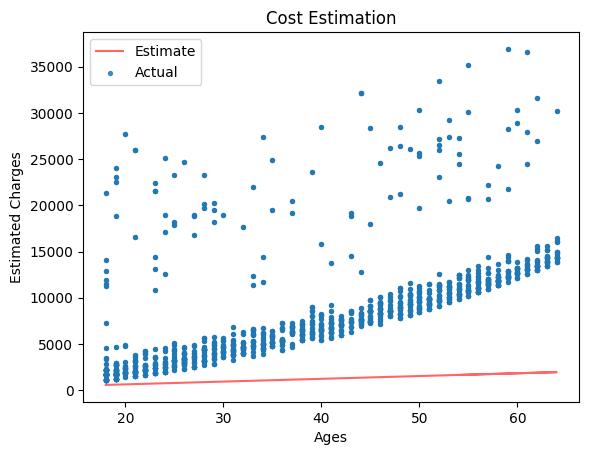

In [27]:
plt.plot(ages,estimated_charges,alpha=0.6,c='r')
plt.scatter(ages,non_smokers.charges,s=8,alpha=0.8)
plt.xlabel('Ages')
plt.ylabel('Estimated Charges')
plt.title('Cost Estimation')
plt.legend(['Estimate','Actual']);
plt.show()

In [28]:
def try_parameter(b0,b1):
    ages=non_smokers.age
    target=non_smokers.charges
    estimated_charges=estimate(b0,b1,x=ages)
   
    plt.scatter(x=ages,y=target,alpha=0.9)
    plt.plot(ages,estimated_charges,c='r',alpha=0.6)
    plt.xlabel('Ages')
    plt.ylabel('Estimated_cost')
    plt.legend(['Estimated','Actual'])
    plt.show()

In [29]:
ages=non_smokers[['age']]
target=non_smokers.charges

In [30]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(ages,target)

LinearRegression()

In [37]:
y_test=model.predict(ages)

In [44]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(target,y_test)
rmse=np.sqrt(mse)
rmse

4714.536974891454

In [45]:
# for linear regression
# b1 values used to find 
w=model.coef_

array([264.61216969])

In [46]:
# b1 value used to find by
b=model.intercept_

-1974.8644275087008

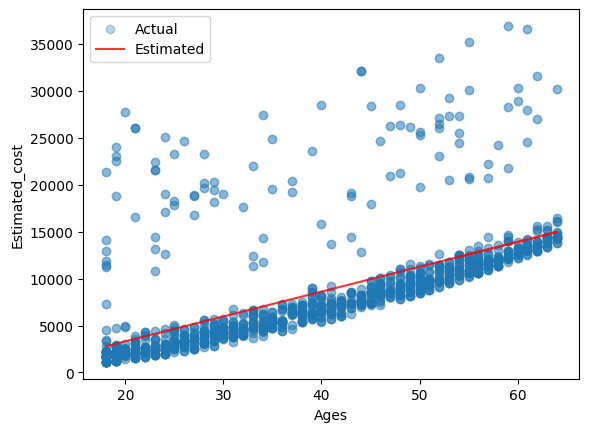

In [57]:
def try_parameter():
    
    def estimate(b0,b1,x): # linear regression formula
        return b0+b1*x
    
    ages=non_smokers.age
    target=non_smokers.charges
    b1=model.coef_
    b0=model.intercept_
    estimated_charges=estimate(b0,b1,x=ages) # estimating the values
   
    plt.scatter(x=ages,y=target,alpha=0.3)
    plt.plot(ages,estimated_charges,c='r',alpha=0.8)
    plt.xlabel('Ages')
    plt.ylabel('Estimated_cost')
    plt.legend(['Actual','Estimated'])
    plt.show()
try_parameter()